# **Cleaning the DataSet**

# _________________________________________________________________________

## **Netflix Stock**

Importing the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
import statistics
import seaborn as sns



In [2]:
#Importing the CSV file
df = pd.read_csv('NFLX.csv')

_________________________________________________________

Observing the first five lines using the head function.

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Checking for Null...

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

*This CSV contains no Null values*

Checking for duplicates...

In [5]:
df.duplicated().sum()

0

*This CSV contains no dupicated Values*

Our dataset contains 1009 rows and 7 columns.

In [6]:
df.shape
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

       

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Statistical Information

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

### **MEAN AND MEDIAN**

In [10]:
print("Mean price is:", statistics.mean(df['Open']))
print("Median price is:", statistics.median(df['Open']))

Mean price is: 419.05967286223984
Median price is: 377.769989


In [11]:
#Date and Time 
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.set_index('Date')

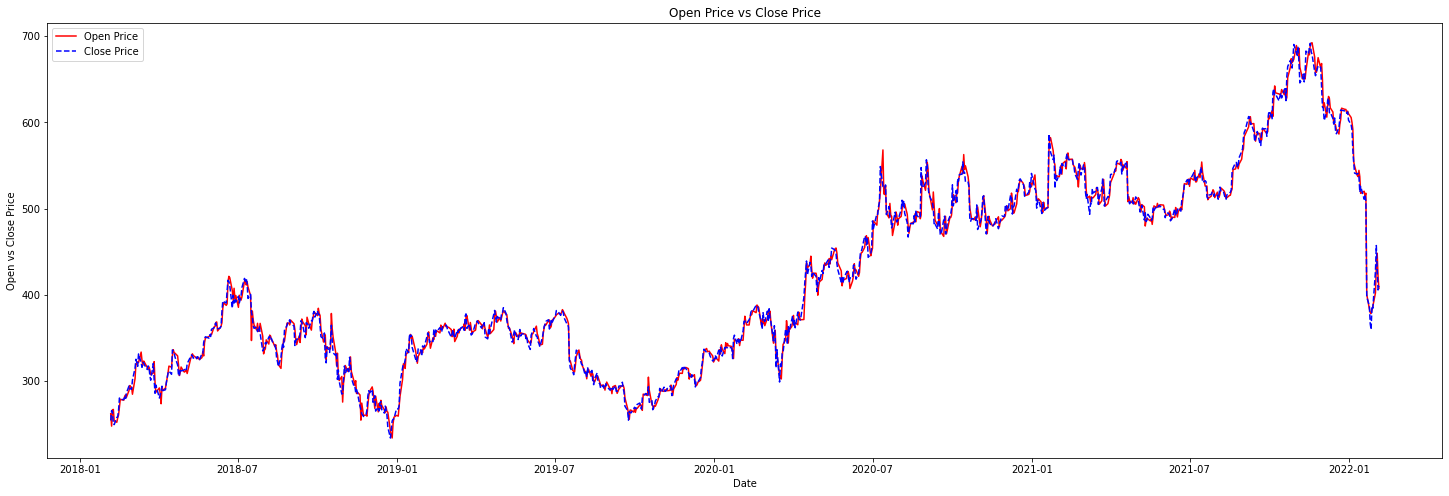

In [12]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price vs Close Price")
plt.plot(df['Open'], color='red', linestyle='solid',  label = 'Open Price')
plt.plot(df['Close'], color='blue', linestyle='dashed',  label = 'Close Price')
plt.xlabel("Date")
plt.ylabel("Open vs Close Price")
plt.legend(loc="upper left")
plt.show()


This graph shows the path for both the open and closed prices of the stock of Netflix from 2018 to 2020. Both prices follow an almost identical part throughout all of the graph. The data starts at January of 2018 where the price is less than 300 and it slowly rises throughout the next seven months until it becomes greater than 400. After that, it starts to descend until it reaches it's lowest point in January of 2019 below 300. After the fall, it rises fast to around 400 but remains constant afterwards for the next seven months. Later, the price starts going down below 300 again and reaches its lowest between July of 2019 and January of 2020. However, once the decrease period passes, it starts growing and does not slow down for the rest of the graph until it becomes greater than 500. This becomes the highest prices that have been seen in the graph.

## Prepare Data for Prediction

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [14]:
#Split data to predict jan2022
train = df.loc['2018-02-05':'2021-12-31']
test = df.loc['2022-01-01':'2022-01-31']

In [15]:
#Split Data
X_train = train.drop(columns = ['Open'])
y_train = train['Open']

X_test = test.drop(columns = ['Open'])
y_test = test['Open']

In [16]:
rf = RandomForestRegressor(max_depth=20, random_state = 42,  n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [17]:
pre=rf.predict(X_test)
train_pre=rf.predict(X_train)

In [18]:
prediction_df=X_test.copy()
prediction_df['Open']=y_test
prediction_df['Predicted Price']=pre
prediction_df.head()


,High,Low,Close,Adj Close,Volume,Open,Predicted Price
Date,,,,,,,
2022-01-03,609.989990,590.559998,597.369995,597.369995,3067500,605.609985,597.302736
2022-01-04,600.409973,581.599976,591.150024,591.150024,4393100,599.909973,589.919729
2022-01-05,592.840027,566.880005,567.520020,567.520020,4148700,592.000000,582.541523
2022-01-06,563.359985,542.010010,553.289978,553.289978,5711800,554.340027,550.311327
2022-01-07,553.429993,538.219971,541.059998,541.059998,3381700,549.460022,547.067863


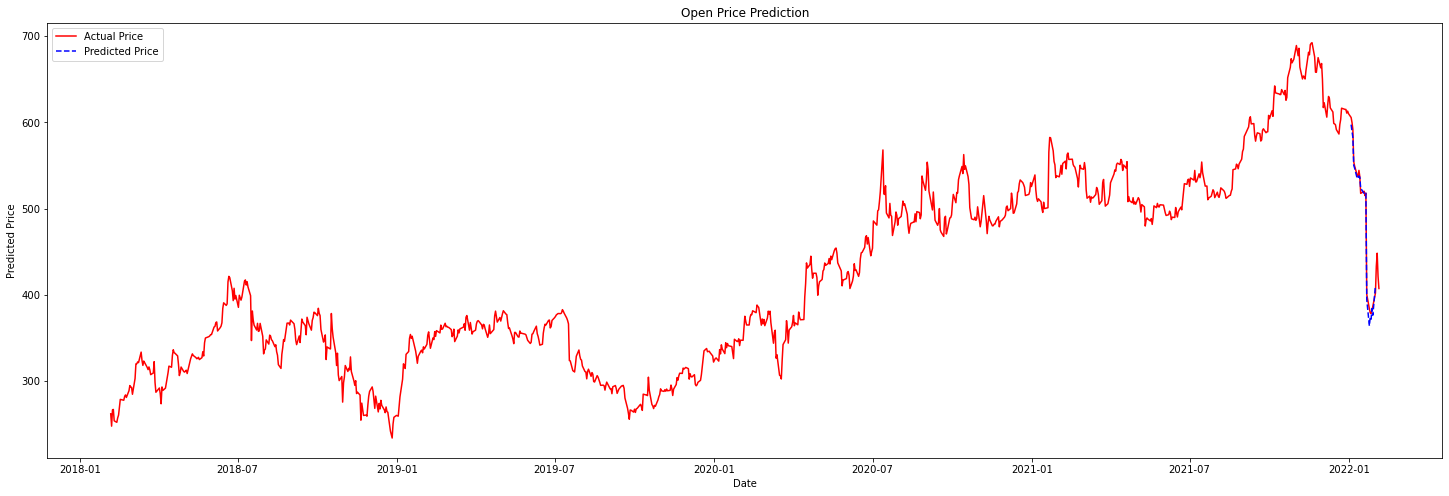

In [19]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price Prediction")
#plt.plot(prediction_df['Open'], color='red', linestyle='solid')
plt.plot(df['Open'], color='red', linestyle='solid', label = 'Actual Price')
plt.plot(prediction_df['Predicted Price'], color='blue', linestyle='dashed', label = 'Predicted Price')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

This graph shows the path that the open price of Netflix stocks has followed starting in the year 2018 and ending in the year 2020. Using this data, we will create a prediction of how the prices should look at the beginning of 2022 (seen in the next graph).

## **Predicted Price VS Actual Price**

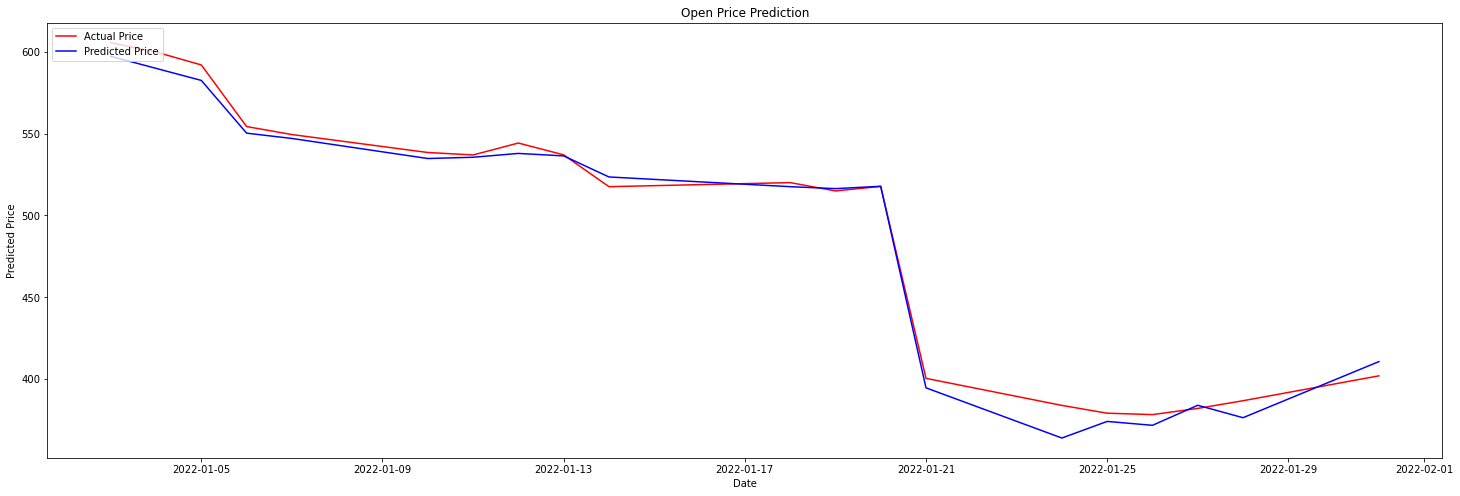

In [20]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price Prediction")
plt.plot(prediction_df['Open'], color='red', linestyle='solid',  label = 'Actual Price')
plt.plot(prediction_df['Predicted Price'], color='blue', linestyle='solid', label = 'Predicted Price')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

Using the data collected from previous years, the graph shows the predicted price for Netflix stocks for the year 2022. When compared to the actual data collected for the prices that year, we can see that the prediction follows a very similar path to the actual data collected. Starting at 600, they both start slowly decreasing in the first days of the year until the price reaches the 500 mark and almost at the same time, they drop significantly at the end of the first moth of 2022, bringing the price to around 400.

# **Accuracy**

In [21]:
from sklearn import metrics

In [22]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, pre), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, pre), 4))
print(f'Train Score : {rf.score(X_train, y_train) * 100:.2f}% and Test Score : {rf.score(X_test, y_test) * 100:.2f}% using Random Tree.')
errors = abs(pre - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.725
Mean Squared Error: 53.3474
Train Score : 99.97% and Test Score : 99.18% using Random Tree.
Accuracy: 98.75 %.
